In [1]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df = pd.read_csv("datapemilukpu-dki-2009.csv")

In [3]:
#exploratory dataset
# view dimensions of dataset

df.shape

(2268, 12)

In [4]:
# preview the dataset
df.head()

,no,Nama Partai,Nama Calon Legislatif,Jenis KeLamin,Kecamatan,No Urut Parpol,Suara Sah Partai,Jumlah Perolehan Kursi,Daerah Pemilihan,No Urut Caleg,Suara Sah Caleg,Terpilih atau Tidak
0,1,Partai Hati Nurani Rakyat,"H. Jamaluddin Lamanda, SH",L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,1,2425,TIDAK
1,2,Partai Hati Nurani Rakyat,Suprawito,L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,2,3348,YA
2,3,Partai Hati Nurani Rakyat,Hj. Endang Barnita,P,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,3,470,TIDAK
3,4,Partai Hati Nurani Rakyat,Syarifuddin,L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,4,424,TIDAK
4,5,Partai Hati Nurani Rakyat,Iksan S. Chaeruddin,L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,5,959,TIDAK


In [5]:
#View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   no                      2268 non-null   int64 
 1   Nama Partai             2268 non-null   object
 2   Nama Calon Legislatif   2268 non-null   object
 3   Jenis KeLamin           2268 non-null   object
 4   Kecamatan               2267 non-null   object
 5   No Urut Parpol          2268 non-null   int64 
 6   Suara Sah Partai        2268 non-null   object
 7   Jumlah Perolehan Kursi  2268 non-null   int64 
 8   Daerah Pemilihan        2268 non-null   object
 9   No Urut Caleg           2268 non-null   int64 
 10  Suara Sah Caleg         2268 non-null   object
 11  Terpilih atau Tidak     2268 non-null   object
dtypes: int64(4), object(8)
memory usage: 212.8+ KB


In [6]:
df['Terpilih atau Tidak'].value_counts()

TIDAK    2174
YA         94
Name: Terpilih atau Tidak, dtype: int64

In [7]:
#cek missing value
df.isnull().sum()

no                        0
Nama Partai               0
Nama Calon Legislatif     0
Jenis KeLamin             0
Kecamatan                 1
No Urut Parpol            0
Suara Sah Partai          0
Jumlah Perolehan Kursi    0
Daerah Pemilihan          0
No Urut Caleg             0
Suara Sah Caleg           0
Terpilih atau Tidak       0
dtype: int64

In [8]:
#drop missing value
df = df.dropna()

In [9]:
df.isnull().sum()

no                        0
Nama Partai               0
Nama Calon Legislatif     0
Jenis KeLamin             0
Kecamatan                 0
No Urut Parpol            0
Suara Sah Partai          0
Jumlah Perolehan Kursi    0
Daerah Pemilihan          0
No Urut Caleg             0
Suara Sah Caleg           0
Terpilih atau Tidak       0
dtype: int64

In [10]:
#Declare feature vector and target variable 
X = df.drop(['Terpilih atau Tidak'], axis=1)
y = df['Terpilih atau Tidak']

In [11]:
#Split data into separate training and test set 
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1518, 11), (749, 11))

In [13]:
#Feature Engineering
# check data types in X_train
X_train.dtypes

no                         int64
Nama Partai               object
Nama Calon Legislatif     object
Jenis KeLamin             object
Kecamatan                 object
No Urut Parpol             int64
Suara Sah Partai          object
Jumlah Perolehan Kursi     int64
Daerah Pemilihan          object
No Urut Caleg              int64
Suara Sah Caleg           object
dtype: object

In [14]:
X_train.head()

,no,Nama Partai,Nama Calon Legislatif,Jenis KeLamin,Kecamatan,No Urut Parpol,Suara Sah Partai,Jumlah Perolehan Kursi,Daerah Pemilihan,No Urut Caleg,Suara Sah Caleg
292,293,Partai Gerakan Indonesia Raya,Djajang M. Zakaria,L,Kota Administrasi Jakarta Utara,5,35464,6,DP-1,7,522
973,974,Partai Demokrasi Pembaruan,Mira Fitri,P,Kota Administrasi Jakarta Selatan,16,4827,0,DP-4,15,31
1578,1579,Partai Bulan Bintang,Drs. SODIKIN,L,Kota Administrasi Jakarta Utara,27,5691,0,DP-1,10,171
1604,1605,Partai Bulan Bintang,SUGIYANTO HADISUMARNO,L,Kota Administrasi Jakarta Timur,27,8385,0,DP-3,10,180
1233,1234,Partai Golkar,"H. MUSLIM SUMARDIONO, SH.",L,Kota Administrasi Jakarta Pusat,23,25214,7,DP-2,5,861


In [15]:
# import category encoders
import category_encoders as ce

In [16]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['no', 'Nama Partai', 'Nama Calon Legislatif', 'Jenis KeLamin', 'Kecamatan', 'No Urut Parpol', 'Suara Sah Partai', 'Jumlah Perolehan Kursi', 'Daerah Pemilihan', 'No Urut Caleg', 'Suara Sah Caleg'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,no,Nama Partai,Nama Calon Legislatif,Jenis KeLamin,Kecamatan,No Urut Parpol,Suara Sah Partai,Jumlah Perolehan Kursi,Daerah Pemilihan,No Urut Caleg,Suara Sah Caleg
292,1,1,1,1,1,1,1,1,1,1,1
973,2,2,2,2,2,2,2,2,2,2,2
1578,3,3,3,1,1,3,3,2,1,3,3
1604,4,3,4,1,3,3,4,2,3,3,4
1233,5,4,5,1,4,4,5,3,4,4,5


In [18]:
X_test.head()

,no,Nama Partai,Nama Calon Legislatif,Jenis KeLamin,Kecamatan,No Urut Parpol,Suara Sah Partai,Jumlah Perolehan Kursi,Daerah Pemilihan,No Urut Caleg,Suara Sah Caleg
188,-1.0,26,-1.0,1,2,26,46.0,2,2,1,156.0
809,-1.0,29,-1.0,1,4,29,85.0,8,4,7,-1.0
1584,-1.0,3,-1.0,1,4,3,106.0,2,4,5,-1.0
1090,-1.0,10,-1.0,1,5,10,118.0,2,5,12,685.0
674,-1.0,20,-1.0,1,5,20,152.0,5,5,1,-1.0


In [19]:
#Decision Tree Classifier with criterion gini index
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
#Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [22]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9453


In [23]:
#Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['TIDAK', 'TIDAK', 'TIDAK', ..., 'TIDAK', 'TIDAK', 'TIDAK'],
      dtype=object)

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9631


In [25]:
#Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9631
Test set score: 0.9453


[Text(334.8, 380.52, 'X[7] <= 5.5\ngini = 0.073\nsamples = 1518\nvalue = [1460, 58]'),
 Text(167.4, 271.8, 'X[10] <= 531.5\ngini = 0.037\nsamples = 1325\nvalue = [1300, 25]'),
 Text(83.7, 163.07999999999998, 'X[7] <= 2.5\ngini = 0.009\nsamples = 1073\nvalue = [1068, 5]'),
 Text(41.85, 54.360000000000014, 'gini = 0.002\nsamples = 852\nvalue = [851, 1]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.036\nsamples = 221\nvalue = [217, 4]'),
 Text(251.10000000000002, 163.07999999999998, 'X[7] <= 2.5\ngini = 0.146\nsamples = 252\nvalue = [232, 20]'),
 Text(209.25, 54.360000000000014, 'gini = 0.031\nsamples = 127\nvalue = [125, 2]'),
 Text(292.95, 54.360000000000014, 'gini = 0.247\nsamples = 125\nvalue = [107, 18]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 21.0\ngini = 0.283\nsamples = 193\nvalue = [160, 33]'),
 Text(418.5, 163.07999999999998, 'X[9] <= 12.5\ngini = 0.45\nsamples = 73\nvalue = [48, 25]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.499\nsamples = 40\nv

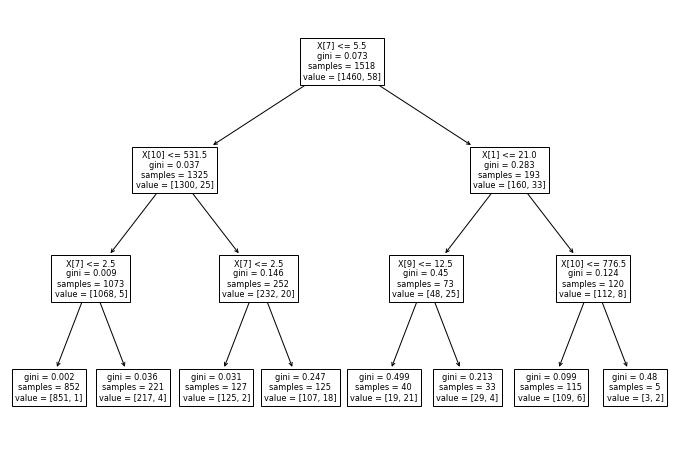

In [26]:
#Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [27]:
#Decision Tree Classifier with criterion entropy
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [28]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [29]:
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9519


In [30]:
#Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['TIDAK', 'TIDAK', 'TIDAK', ..., 'TIDAK', 'TIDAK', 'TIDAK'],
      dtype=object)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9618


In [32]:
#Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9618
Test set score: 0.9519


[Text(306.90000000000003, 380.52, 'X[7] <= 2.5\nentropy = 0.234\nsamples = 1518\nvalue = [1460, 58]'),
 Text(167.4, 271.8, 'X[7] <= 1.5\nentropy = 0.03\nsamples = 979\nvalue = [976, 3]'),
 Text(111.60000000000001, 163.07999999999998, 'X[10] <= 568.5\nentropy = 0.168\nsamples = 121\nvalue = [118, 3]'),
 Text(55.800000000000004, 54.360000000000014, 'entropy = 0.081\nsamples = 100\nvalue = [99, 1]'),
 Text(167.4, 54.360000000000014, 'entropy = 0.454\nsamples = 21\nvalue = [19, 2]'),
 Text(223.20000000000002, 163.07999999999998, 'entropy = 0.0\nsamples = 858\nvalue = [858, 0]'),
 Text(446.40000000000003, 271.8, 'X[9] <= 12.5\nentropy = 0.475\nsamples = 539\nvalue = [484, 55]'),
 Text(334.8, 163.07999999999998, 'X[6] <= 65.5\nentropy = 0.629\nsamples = 304\nvalue = [256, 48]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.83\nsamples = 122\nvalue = [90, 32]'),
 Text(390.6, 54.360000000000014, 'entropy = 0.429\nsamples = 182\nvalue = [166, 16]'),
 Text(558.0, 163.07999999999998, 'X[1] <= 11

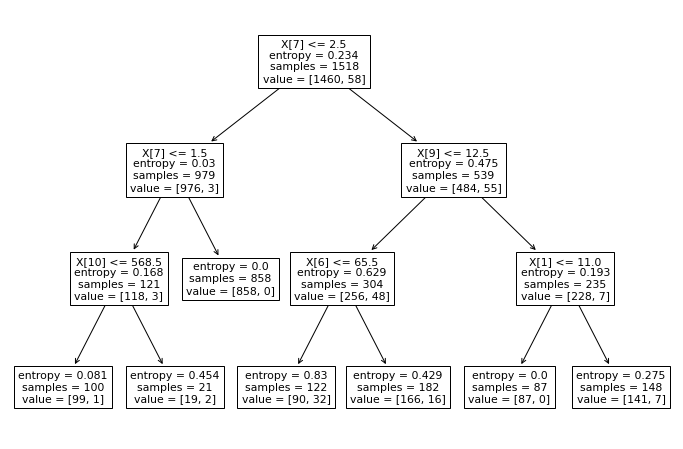

In [33]:
#Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [34]:
#Confusion matrix
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[713   0]
 [ 36   0]]


In [35]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

       TIDAK       0.95      1.00      0.98       713
          YA       0.00      0.00      0.00        36

    accuracy                           0.95       749
   macro avg       0.48      0.50      0.49       749
weighted avg       0.91      0.95      0.93       749

